In [18]:
import pandas as pd
from datetime import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [19]:
data = pd.read_csv(r'D:\Code\DS108\preprocessing\tidy_data.csv', encoding = 'utf-8-sig')

In [20]:
# Số dòng và cột của dữ liệu
data.shape

(13224, 28)

In [21]:
# Các thuộc tính của dữ liệu
data.columns

Index(['name', 'brand', 'condition', 'price_old', 'price_new', 'warranty',
       'CPU', 'RAM', 'capacity', 'time', 'battery', 'screen_size',
       'operating_system', 'display_technology', 'size', 'weight', 'bluetooth',
       'refresh_rate', 'GPU', 'color', 'image', 'resolution_width',
       'resolution_height', 'has_nano_sim', 'has_esim', 'height', 'width',
       'depth'],
      dtype='object')

# Tính khoảng thời gian điện thoại đã ra mắt

In [22]:
data['time'] = pd.to_datetime(data['time'])

In [23]:
# Tính toán khoảng thời gian hiện tại - 'time'
data['time_difference'] = datetime.now() - data['time']
data['time_difference'] = data['time_difference'].dt.days

In [24]:
data.drop(columns=['time'], inplace=True)

# Tính thời gian hết bảo hành

In [25]:
processed_results = []
current_date = datetime.now() # Lấy ngày và giờ hiện tại

for index, item in data['warranty'].items():
    item = str(item).strip() # Đảm bảo item là chuỗi và loại bỏ khoảng trắng

    # Kiểm tra nếu có chứa "tháng"
    if "tháng" in item:
        num_months_str = item.replace("tháng", "").strip()
        num_months = int(num_months_str)

        # Xử lý cộng tháng
        year = current_date.year
        month = current_date.month + num_months
        day = current_date.day

        while month > 12:
            month -= 12
            year += 1
                
        # Xử lý trường hợp ngày không hợp lệ sau khi cộng tháng
        try:
            new_date = datetime(year, month, day)
        except ValueError:
            # Nếu ngày không hợp lệ, lấy ngày cuối cùng của tháng đó
            last_day_of_month = calendar.monthrange(year, month)[1]
            new_date = datetime(year, month, last_day_of_month)

        # Cập nhật giá trị
        data.loc[index, 'warranty'] = new_date.strftime("%d/%m/%Y")
    else:
            datetime.strptime(item, "%d/%m/%Y")
            data.loc[index, 'warranty'] = item 

# Chuyển dữ liệu sang kiểu datetime
data['warranty'] = pd.to_datetime(data['warranty'], format='%d/%m/%Y', errors='coerce')

In [26]:
# Tạo một Series mới cho current_date
current_date_series = pd.Series([current_date] * len(data))

# Tính hiệu số ngày
time_remaining = data['warranty'] - current_date_series

# Lưu vào một cột mới
data['day_remaining_warranty'] = time_remaining.dt.days + 1

In [27]:
data.drop(columns=['warranty'], inplace=True)

# Chọn thuộc tính

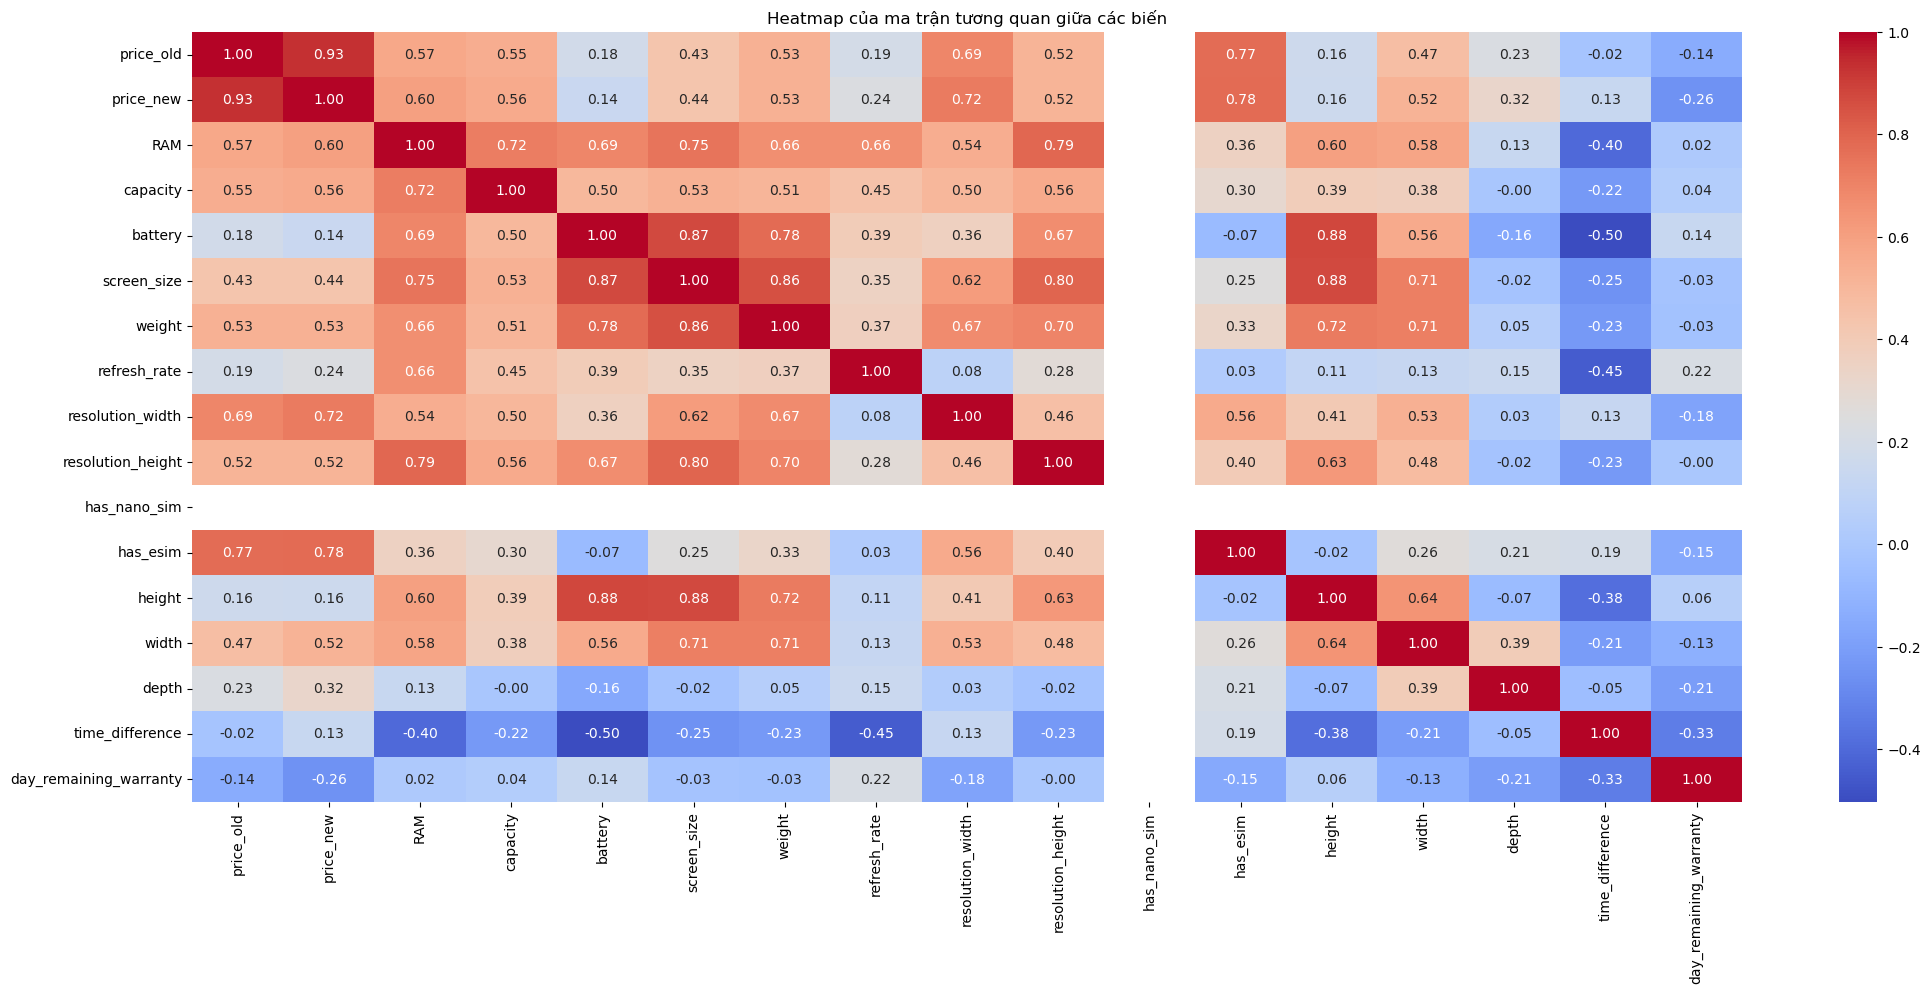

In [29]:
# Loại bỏ cột không liên quan
numerical_cols = data.select_dtypes(include=np.number).columns.tolist()

# Vẽ heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(data[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap của ma trận tương quan giữa các biến")
plt.show()

In [38]:
from sklearn.feature_selection import f_classif

# Tách features (X) và target (y)
X = data.select_dtypes(include=['number']).drop(columns=['price_old'])
X = X.fillna(0)
y = data['price_old']

# Tính ANOVA F-test
f_values, p_values = f_classif(X, y)

# Gộp kết quả vào một DataFrame
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Score': f_values,
    'p-Value': p_values
})

# Sắp xếp theo F-Score giảm dần
anova_results = anova_results.sort_values(by='F-Score', ascending=False)

print(anova_results)

                   Feature     F-Score        p-Value
4              screen_size  809.856103   0.000000e+00
0                price_new  292.134894   0.000000e+00
13                   depth  234.531274   0.000000e+00
3                  battery  135.332915   0.000000e+00
10                has_esim  102.021213   0.000000e+00
1                      RAM  100.447515   0.000000e+00
8        resolution_height   93.376703   0.000000e+00
6             refresh_rate   69.323209   0.000000e+00
7         resolution_width   65.738905   0.000000e+00
2                 capacity   49.718992   0.000000e+00
15  day_remaining_warranty   40.223665   0.000000e+00
12                   width   30.238246   0.000000e+00
5                   weight   26.624136   0.000000e+00
14         time_difference   18.080304   0.000000e+00
11                  height   13.755696   0.000000e+00
9             has_nano_sim    2.277323  3.006292e-107


# Chia dữ liệu tập train, dev và test 

In [12]:
from sklearn.model_selection import train_test_split

# Chia tập dữ liệu thành train (60%), tạm thời còn lại 40% sẽ chia tiếp
train, temp = train_test_split(data, test_size=0.4, random_state=42)

# Chia tiếp tập còn lại thành dev (20%) và test (20%)
dev, test = train_test_split(temp, test_size=0.5, random_state=42)


# Encoding

In [13]:
print(data['operating_system'].unique())

['iOS 16' 'iOS 15' 'Android 13' 'Android 14' 'iOS 17' 'ColorOS 13.1' nan
 'iOS 18' 'iOS 13' 'iOS 11' 'Android 12' 'iOS 12' 'iOS 14.1'
 'Xiaomi HyperOS' 'Funtouch OS 13' 'Android 15' 'MIUI 14' 'ColorOS 15'
 'Android 17' 'Xiaomi HyperOS 2' 'XOS 14' 'Android 11' 'ColorOS 14'
 'Android 10' 'ColorOS 12.1' 'Android 16' 'MIUI 13' 'Android T' 'OxygenOS'
 'Android 10.0' 'realme UI 4.0' 'Android U' 'Mocor' 'Android 9.0'
 'Series 30' 'S30']


In [14]:
# Hàm nhóm hệ điều hành vào các loại chính
def map_os_family(os):
    if pd.isnull(os):
        return 'Unknown'
    os = os.lower()
    if 'ios' in os:
        return 'iOS'
    elif 'android' in os:
        return 'Android'
    elif 'coloros' in os:
        return 'Android'
    elif 'miui' in os:
        return 'Android'
    elif 'hyperos' in os:
        return 'Android'
    elif 'funtouch' in os:
        return 'Android'
    elif 'oxygenos' in os:
        return 'Android'
    elif 'realme ui' in os:
        return 'Android'
    elif 'xos' in os:
        return 'Android'
    elif 'mocor' in os:
        return 'Android'
    elif 'series 30' in os or 's30' in os:
        return 'Feature OS'
    else:
        return 'Other'

# Tạo cột os
data['os'] = data['operating_system'].apply(map_os_family)




In [15]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['os'] = encoder.fit_transform(data['os'])

In [16]:
data['chip'] = data['CPU'].str.extract(r'(Apple|Snapdragon|MediaTek|Exynos|Unisoc)', expand=False)


In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
data['chip'] = encoder.fit_transform(data['chip'])

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
data['display_technology'] = data['display_technology'].fillna("Unknown")
display_tfidf = tfidf.fit_transform(data['display_technology'])
tfidf_df = pd.DataFrame(display_tfidf.toarray(), columns=tfidf.get_feature_names_out())
data = pd.concat([data, tfidf_df], axis=1)

